# Rolling & Expanding - Скользящее и расширяющееся окно

In [1]:
import pandas as pd

Первый набор инструментов, который мы рассмотрим, относится к группе, которую можно назвать скользящие статистики (или оконные функции). Суть их заключается в том, что различные статистики (например, среднее) расчитываются не для всех объектов структуры, а только для группы подряд идущих значений (скользящее окно), размер этой группы предварительно задается задавать вручную (этот параметр носит название - размер окна). Таким образом мы можем рассчитать скользящее среднее, скользящуюю сумму и другие нужные нам статистики через агрегирующие функции:

Скользящее среднее (также называемое "простое скользящее среднее" или "конечное скользящее среднее") представляет собой среднее арифметическое значение наблюдений в определенном окне или периоде, который "скользит" вдоль временного ряда. Скользящее среднее помогает сгладить краткосрочные колебания и шумы, выявлять тренды и улавливать долгосрочные закономерности в данных.

Чтобы вычислить скользящее среднее, нужно определить размер окна (количество наблюдений, включенных в среднее) и, начиная с первого значения в временном ряду, взять среднее арифметическое значение наблюдений в этом окне. Затем окно сдвигается на одно наблюдение вперед, и процесс повторяется до тех пор, пока окно не достигнет конца временного ряда.

Для вычисления скользящего среднего в Pandas реализован метод DataFrame.rolling, который создает скользящее окно для проведения различных операций на окне данных. Скользящее окно имеет определенный размер и перемещается по временному ряду или другому набору данных с одним шагом за раз. Для каждого положения окна вычисляется статистика, такая как среднее, медиана, сумма и т. д.

При использовании метода rolling нужно указать размер окна с помощью параметра window. Затем можете применять различные функции к этому скользящему окну, например, функцию mean для вычисление скользящего среднего для конкретного элемента.

Таким образом, для ряда данных в переменной df вычислить скользящее среднее можно следующим образом:

In [2]:
data = [4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data, columns=['Значения'])
# Создание объекта Rolling с окном 3
display(df["Значения"].rolling(window=3))
# Применяем агрегирующую функцию mean к объекту Rolling (вычисление скользящего среднего)
display(df['Значения'].rolling(window=3).mean())
# Результаты вычисления скользящего среднего будут сохранены в одноименный столбик
df['Скользящее_среднее'] = df['Значения'].rolling(window=3).mean()
display(df)

Rolling [window=3,center=False,axis=0,method=single]

0    NaN
1    NaN
2    5.0
3    6.0
4    7.0
5    8.0
Name: Значения, dtype: float64

,Значения,Скользящее_среднее
0,4,NaN
1,5,NaN
2,6,5.0
3,7,6.0
4,8,7.0
5,9,8.0


Как вы можете видеть, до 3-го элемента (в нашем случае это элемент с индексом 2) элементы структуры имеют значение NaN. Это связно с тем, что размер окна равен 3 (window=3), и статистика считается по трем предыдущим элементам, такой момент наступает, когда мы доходим до индекса 2.

Можно использовать свои функции для расчета статистик, для этого их необходимо предварительно создать, а потом передать в качестве параметра методу apply().

Пример анализа изменений цен на акции компании Microsoft за последние 2 года
Давайте рассмотрим более интересный и приближенный к реальности пример, где вычисление скользящего среднего могут очень пригодиться. Мы проанализируем ежедневное изменение цены на акции компании Microsoft за последние 2 года.

Сначала установим библиотеку yfinance, необходимую для получения цен для акции:

In [3]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

Мы можем использовать метод history или метод download() библиотеки yfinance для получения показателей (Open High Low Close Adi Close и Volume), которые характеризуют ежедневное изменение цены на акции Microsoft.

In [4]:
# запрашиваем историю по тикеру 'MSFT' за последние 2 года
msft = yf.Ticker('MSFT').history(period='2y')
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-14 00:00:00-04:00,329.220739,333.848787,327.714167,332.174805,26003800,0.0,0.0
2023-06-15 00:00:00-04:00,332.312752,344.483490,332.037041,342.770142,38899100,0.0,0.0
2023-06-16 00:00:00-04:00,345.940780,346.088477,336.714253,337.088409,46533600,0.0,0.0
2023-06-20 00:00:00-04:00,334.114649,336.842225,330.717462,332.873932,26375400,0.0,0.0
2023-06-21 00:00:00-04:00,331.219701,332.558893,326.985552,328.452728,25117800,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-09 00:00:00-04:00,469.700012,473.429993,468.619995,472.750000,16469900,0.0,0.0
2025-06-10 00:00:00-04:00,471.190002,472.799988,466.959991,470.920013,15375900,0.0,0.0
2025-06-11 00:00:00-04:00,470.019989,475.470001,469.660004,472.619995,16399200,0.0,0.0


Данные сохранятся в датафрейм в переменной msft, и мы сможем посчитать скользящее среднее для цены закрытия акций с размером окна 50 дней:

In [5]:
msft['SMA_50'] = msft['Close'].rolling(window=50).mean()
msft['SMA_50']

Date
2023-06-14 00:00:00-04:00           NaN
2023-06-15 00:00:00-04:00           NaN
2023-06-16 00:00:00-04:00           NaN
2023-06-20 00:00:00-04:00           NaN
2023-06-21 00:00:00-04:00           NaN
                                ...    
2025-06-09 00:00:00-04:00    417.671501
2025-06-10 00:00:00-04:00    419.527784
2025-06-11 00:00:00-04:00    421.486142
2025-06-12 00:00:00-04:00    423.433749
2025-06-13 00:00:00-04:00    425.304153
Name: SMA_50, Length: 502, dtype: float64

Визуализируем результат

Рисуем с помощью ранее импортированной библиотеки matplotlib.pyplot обычный линейный график, который отобразит динамику изменения цены закрытия за каждый день и скользящую среднюю за 50-дней. Строим график:

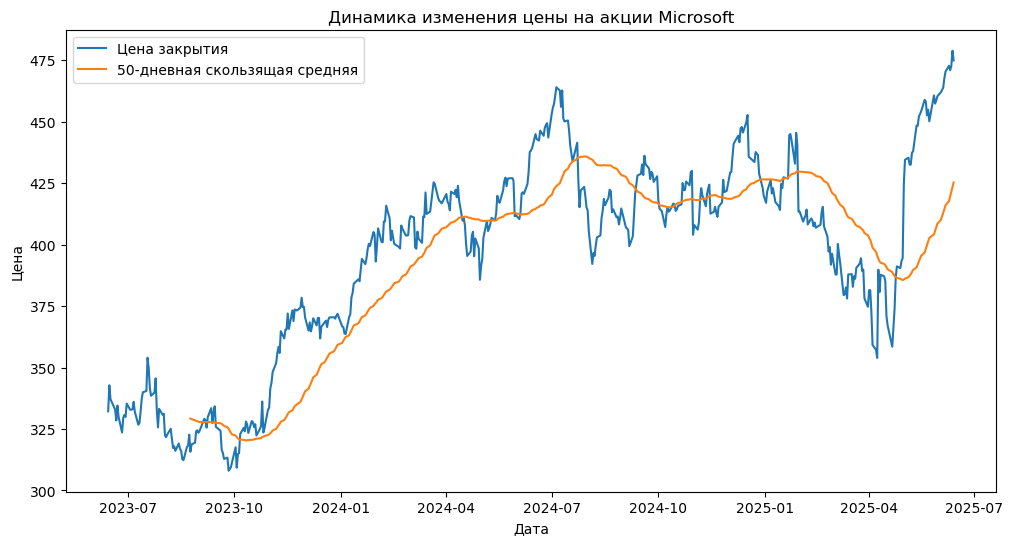

In [6]:
plt.figure(figsize=(12, 6)) 
plt.plot(msft['Close'], label='Цена закрытия')
plt.plot(msft['SMA_50'], label='50-дневная скользящая средняя') 
plt.title('Динамика изменения цены на акции Microsoft') 
plt.xlabel('Дата')
plt.ylabel('Цена') 
plt.legend() 
plt.show()

Скользящая средняя за 50 дней (оранжевая линия) на графике акций Microsoft помогает увидеть общий тренд и сгладить дневные колебания стоимости акций. Это позволяет аналитикам и инвесторам лучше понять, какие долгосрочные тенденции доминируют на рынке и определить восходящие или нисходящие тренды.

## Расширяющееся окно. Объект Expanding

Итак, мы познакомились со скользящими окнами и расчетом статистик по ним. Этот раздел посвящен расширяющимся окнами, размер которых, в отличии от скользящих, изменяется, расширяясь, начиная с первого элемента. Для работы с расширяющимся окном используется объект Expanding, который можно получить через метод DataFrame.expanding().
Для расчета статистик используются функции, аналогичные тем, что применяются при работе с объектами Rolling (таблица выше).

Вычислим сумму значений для расширяющегося окна: 

In [7]:
data = [4, 5, 6, 7, 8, 9]
df2 = pd.DataFrame(data, columns=['Значения'])
# Создание объекта Rolling с окном 3
display(df2['Значения'].expanding())
# Применяем агрегирующую функцию sum к объекту Expanding
display(df2['Значения'].expanding().sum())
# Рассчет суммы для расширяющегося окна с сохранием в соответствующий столбик
df2['Сумма_расширяющегося_окна'] = df2['Значения'].expanding().sum()
df2

Expanding [min_periods=1,axis=0,method=single]

0     4.0
1     9.0
2    15.0
3    22.0
4    30.0
5    39.0
Name: Значения, dtype: float64

,Значения,Сумма_расширяющегося_окна
0,4,4.0
1,5,9.0
2,6,15.0
3,7,22.0
4,8,30.0
5,9,39.0


Время-ориентированное скольжение
Суть время-ориентированного скольжения в том, что в качестве окна используется временной интервал.

In [8]:
df3 = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                  index=pd.date_range('2025-01-01 00:00:00', periods=10, freq='s'), 
                  columns=['num_col'])
df3

,num_col
2025-01-01 00:00:00,1
2025-01-01 00:00:01,2
2025-01-01 00:00:02,3
2025-01-01 00:00:03,4
2025-01-01 00:00:04,5
2025-01-01 00:00:05,6
2025-01-01 00:00:06,7
2025-01-01 00:00:07,8
2025-01-01 00:00:08,9
2025-01-01 00:00:09,10


In [9]:
# Создадим объект Rolling с окном в 3 секунды:
r3s = df3.rolling('3s')
r3s

Rolling [window=3s,min_periods=1,center=False,axis=0,method=single]

In [10]:
# Создадим объект Rolling с окном в 5 секунд:
rs5 = df3.rolling('5s')
# применяем агрегирующую функцию sum к объекту Rolling
rs5.sum()

,num_col
2025-01-01 00:00:00,1.0
2025-01-01 00:00:01,3.0
2025-01-01 00:00:02,6.0
2025-01-01 00:00:03,10.0
2025-01-01 00:00:04,15.0
2025-01-01 00:00:05,20.0
2025-01-01 00:00:06,25.0
2025-01-01 00:00:07,30.0
2025-01-01 00:00:08,35.0
2025-01-01 00:00:09,40.0


In [11]:
# применяем сразу несколько агрегирующих функций
rs5.agg(['sum', 'mean', 'std'])

num_col               
                        sum mean       std
2025-01-01 00:00:00     1.0  1.0       NaN
2025-01-01 00:00:01     3.0  1.5  0.707107
2025-01-01 00:00:02     6.0  2.0  1.000000
2025-01-01 00:00:03    10.0  2.5  1.290994
2025-01-01 00:00:04    15.0  3.0  1.581139
2025-01-01 00:00:05    20.0  4.0  1.581139
2025-01-01 00:00:06    25.0  5.0  1.581139
2025-01-01 00:00:07    30.0  6.0  1.581139
2025-01-01 00:00:08    35.0  7.0  1.581139
2025-01-01 00:00:09    40.0  8.0  1.581139

Включение конечных точек интервала в вычисления скользящего окна может быть задано с помощью аргумента closed:

In [12]:
df4 = pd.DataFrame({'x': 1},index=[
        pd.Timestamp('20250101 00:00:01'),
        pd.Timestamp('20250101 00:00:02'),
        pd.Timestamp('20250101 00:00:03'),
        pd.Timestamp('20250101 00:00:04'),
        pd.Timestamp('20250101 00:00:06'),])
df4

,x
2025-01-01 00:00:01,1
2025-01-01 00:00:02,1
2025-01-01 00:00:03,1
2025-01-01 00:00:04,1
2025-01-01 00:00:06,1


In [13]:
df4['right'] = df4.rolling('2s', closed='right').x.sum()  # по умолчанию
df4['both'] = df4.rolling('2s', closed='both').x.sum()
df4['left'] = df4.rolling('2s', closed='left').x.sum()
df4['neither'] = df4.rolling('2s', closed='neither').x.sum()
df4

,x,right,both,left,neither
2025-01-01 00:00:01,1,1.0,1.0,NaN,NaN
2025-01-01 00:00:02,1,2.0,2.0,1.0,1.0
2025-01-01 00:00:03,1,2.0,3.0,2.0,1.0
2025-01-01 00:00:04,1,2.0,3.0,2.0,1.0
2025-01-01 00:00:06,1,1.0,2.0,1.0,NaN
